In [30]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import stats
from math import pi
from scipy.stats import expon
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle

Моделируем выборку с заданными весами. Сначала для неупорядоченных весов.

Время генерации =  0.004000186920166016


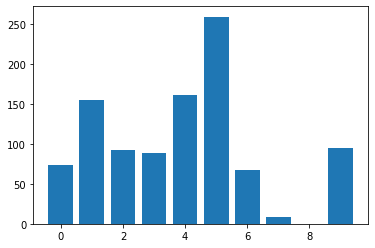

In [6]:
start = time.time()
vesa = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
vesa/=vesa.sum()
b = [vesa[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Время генерации = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.show()

Попробуем упорядочить. Будем проверять отрезки большей длины быстрее. Это уменьшит время работы алгоритма.

Time of generation =  0.003000497817993164


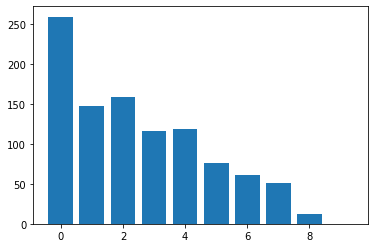

In [14]:
start2 = time.time()
sort_vesa = np.sort(vesa)[::-1]
b = [sort_vesa[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end2 = time.time()
print("Time of generation = ", end2-start2)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.show()

In [ ]:
Моделируем экспоненциальное распределение:

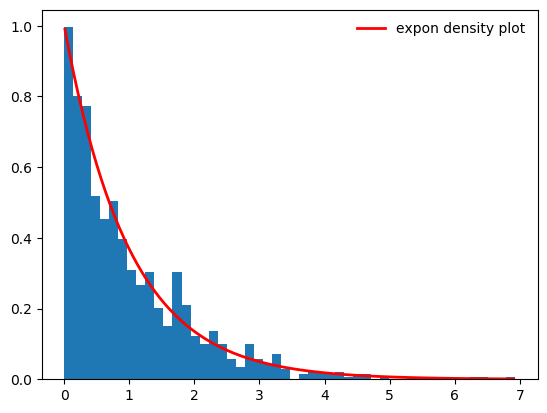

In [22]:
plt.rcdefaults()
x = np.linspace(expon.ppf(0.01),expon.ppf(0.999), 100)
plt.plot(x, expon.pdf(x),'red', lw=2, alpha=1, label='expon density plot')
r = expon.rvs(size=1000)
plt.hist(r, density=True, bins=50)
plt.legend(loc='best', frameon=False)
plt.show()

In [ ]:
Моделируем усеченнное распределение Коши методом accept-reject

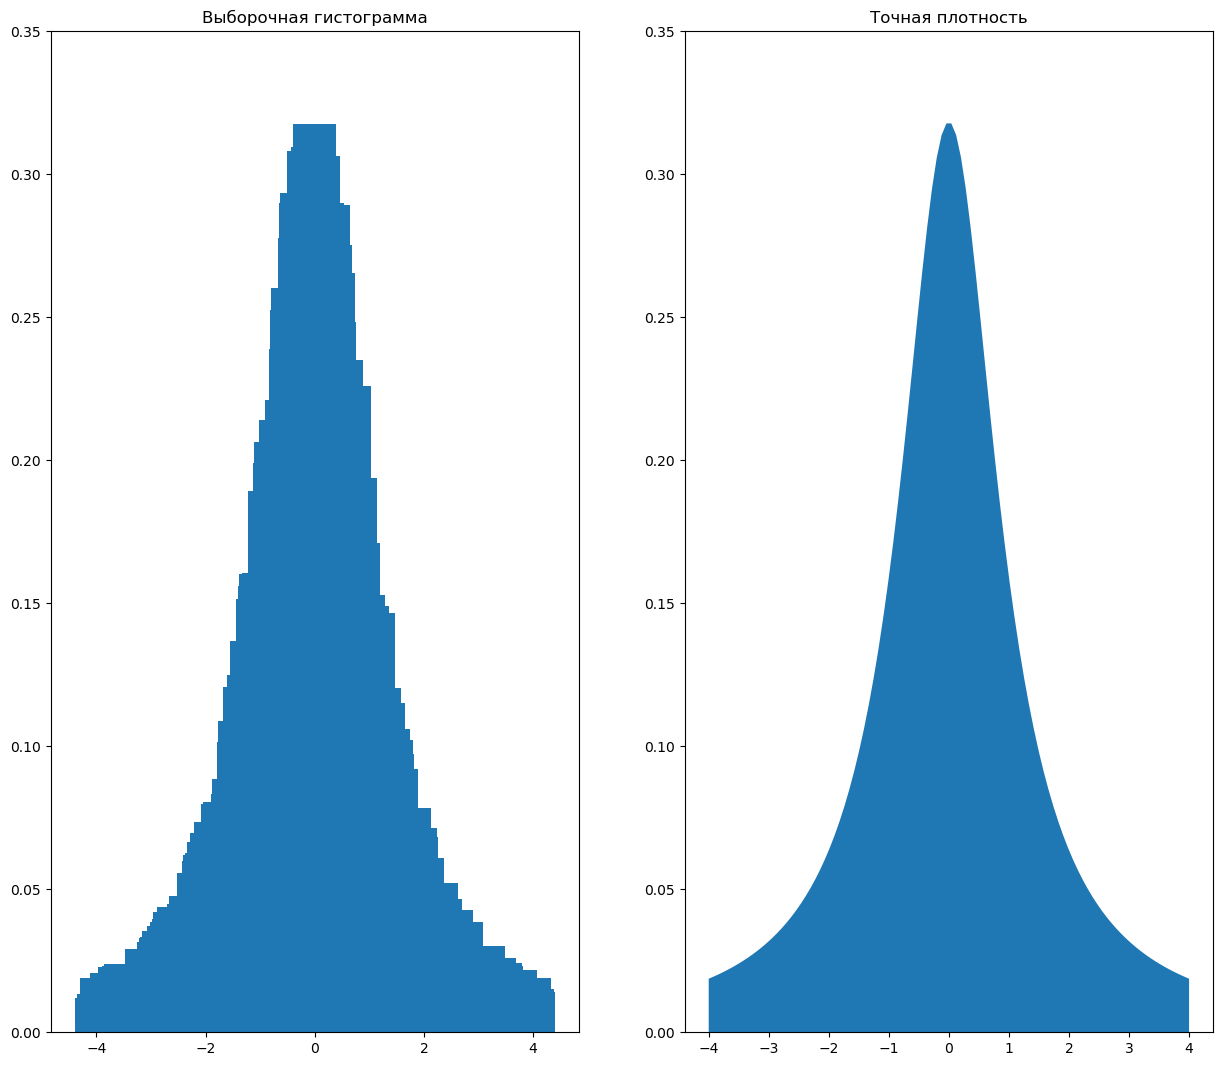

In [26]:
rand = [8*np.random.rand()-4 for i in range(1000)]
rand.sort()
cau = []
k=0
while k!=1000:
    z = 1/pi*np.random.rand()
    if z < 1/(pi*(1+rand[k]*rand[k])):
        cau.append(z)
        k+=1
plt.figure(figsize=(15,13))
plt.subplot(1,2,1)
plt.title("Выборочная гистограмма")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.bar(rand, cau)
plt.subplot(1,2,2)
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.title("Точная плотность")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.fill_between(x, 0, dist.pdf(x))
plt.show()

Моделируем выборку внутри треугольника:

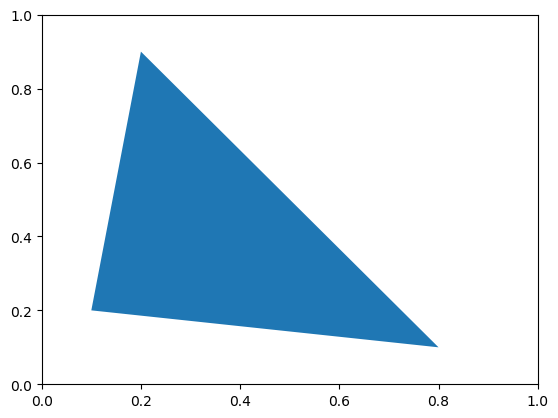

In [28]:
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

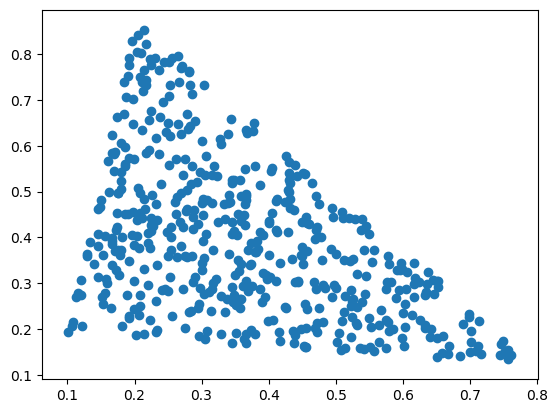

In [29]:
x=np.random.uniform(size=500)
y=np.random.uniform(size=500)
mask=(x+y)>1
x[mask]=1-x[mask]
y[mask]=1-y[mask]
x = 0.7*x+0.1*y+0.1
y=-0.1*x+0.7*y+0.2
plt.scatter(x,y)
plt.show()

Моделируем выборку внутри круга:

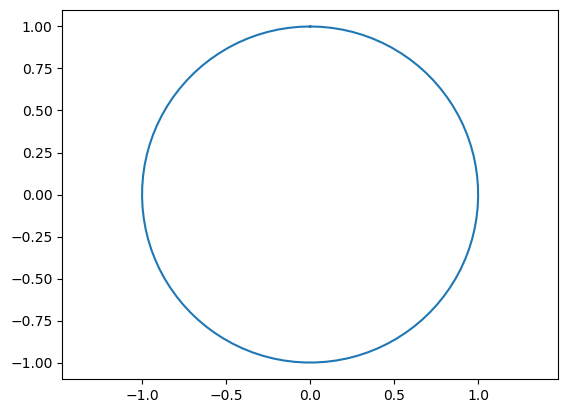

In [31]:
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

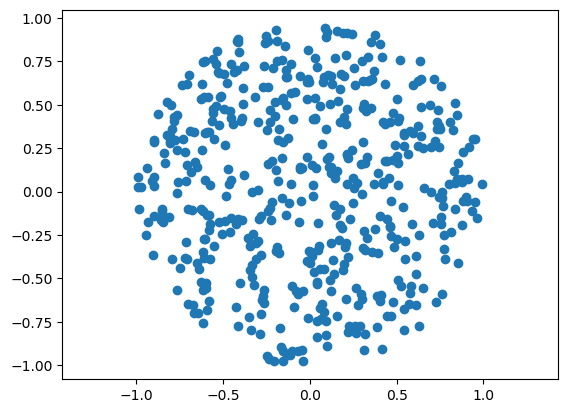

In [32]:
phi=np.random.uniform(low=0,high=2*np.pi,size=500)
r=np.random.uniform(size=500)
r=np.sqrt(r)
plt.scatter(r*np.cos(phi),r*np.sin(phi))
plt.axis('equal')
plt.show()

Моделируем случайное блуждание:

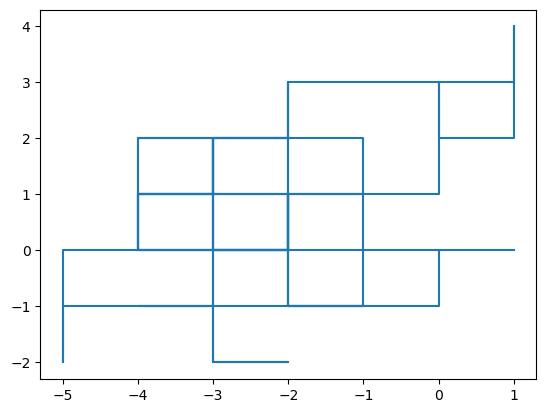

In [34]:
n=100
a_minus_index=np.random.choice(np.arange(n),n//2,replace=False)
b_minus_index=np.random.choice(np.arange(n),n//2,replace=False)
a_steps=np.ones(n)
a_steps[a_minus_index]=-1
b_steps=np.ones(n)
b_steps[b_minus_index]=-1
a=np.cumsum(a_steps)
b=np.cumsum(b_steps)
x=(a+b)/2
y=(b-a)/2
plt.plot(x,y)
plt.show()

Box-Muller algorithm:

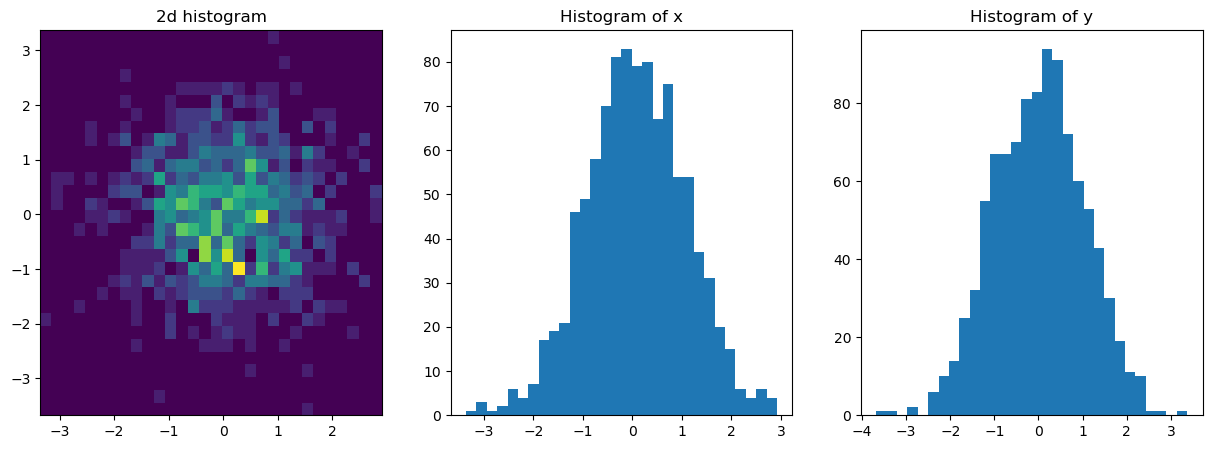

In [35]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

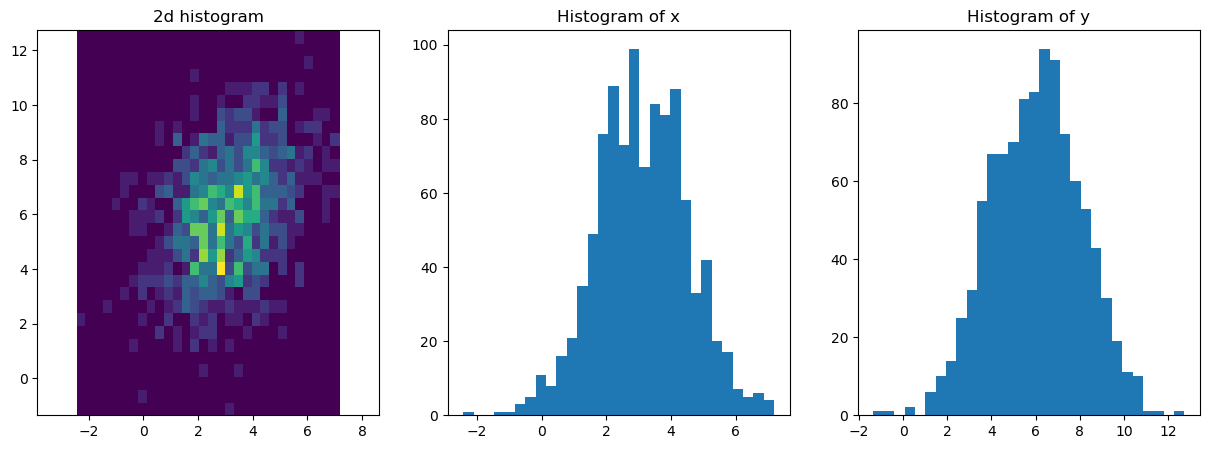

In [36]:
new_x=np.sqrt(7)/2*x+1/2*y+3
new_y = 2 * y + 6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(new_x, new_y, bins=30)
ax[0].axis('equal')
ax[1].hist(new_x, bins=30)
ax[2].hist(new_y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Генерация случайного разбиения n-элементного множества на подмножества:

In [39]:
n = 100
def partition(n):
    B = 0
    for k in range(1,100):
        B+=k**n/np.math.factorial(k)
    B*=1/np.exp(1)
    P = np.array([k**n/(np.math.factorial(k)*np.exp(1)*B) for k in range(1,101)])
    Ch = [P[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<Ch[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    P = np.array([1/r for i in range(r)])
    Ch = [P[:i].sum() for i in range(1,r+1)]
    C = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if C[i]<Ch[k]:
                c.append(k)
                k=-1
            else:
                k+=1
EX = 0
for i in range(7000):
    c = []
    partition(n)
    EX+=len(np.unique(c))
EX/=7000
print(EX)

28.687285714285714
